In [2]:
from astropy.stats import sigma_clipped_stats
from photutils import datasets
from photutils import CircularAperture
from photutils import aperture_photometry
import numpy as np
from photutils import DAOStarFinder
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
from astropy.io import fits
from imaka.reduce import reduce_20161118 as red 
%matplotlib inline

In [3]:
data_dir = '/Users/jlu/data/imaka/2016_11_18/reduce_data/'
image = fits.getdata(data_dir + "open_red/obj_135_red.fits")
data = red.rebin(image, 10)
mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
print((mean, median, std))    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jlu/data/imaka/2016_11_18/reduce_data/open_red/obj_135_red.fits'

In [60]:
daofind = DAOStarFinder(fwhm=1.0, threshold=5.*std)    
sources = daofind(data - median)    
print(sources) 

 id     xcentroid        ycentroid    ...      flux           mag      
--- ----------------- --------------- ... ------------- ---------------
  1     9.06430443003 0.0386399929821 ... 15.5639679762  -2.98030082136
  2     37.7646965987   0.08121418124 ... 7.11423378771  -2.13032033214
  3     41.4923215526 0.0348688781443 ... 13.6899177899  -2.84100210034
  4     166.139428395   0.10140550046 ... 10.1101731241  -2.51189648102
  5     168.790451345 0.0941782952529 ... 4.22113507187  -1.56357312336
  6     172.488162196  0.037209565758 ... 11.4299243006  -2.64510838528
  7     210.705235356 -0.150785531298 ... 5.21225022033  -1.79256314092
  8     219.413461256 -0.153907052381 ... 7.86956260399  -2.23987648657
  9     58.1316370043 -0.325001920498 ... 2.07705674549 -0.793620904215
 10     215.522648307    0.1727697837 ... 1.77399781488 -0.622382701389
...               ...             ... ...           ...             ...
 43      177.69653076   162.951638109 ...  4.3507949421  -1.5964

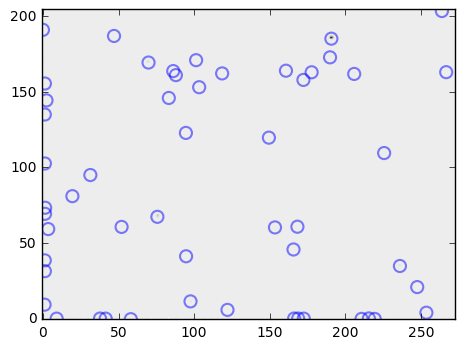

In [61]:
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)


In [86]:
##Taking out edge sources, within 5 pixels of a side

data_array = np.array(sources)
final_list = []
for line in data_array:
    if line[1] > 5 and line[2] > 5:
        final_list.append((line[1], line[2]))

In [97]:
#Calculate encircled energies for a given radius

original_plate_scale = 23.0 #mas/pixel
plate_scale_arcsec = original_plate_scale * 3 * 10 * 1e-3 #as/pix, (binned twice)

radius_arcsec = 0.8
radius_pixel = radius_arcsec / plate_scale_arcsec
positions = final_list
apertures = CircularAperture(positions, r=radius_pixel)

phot_table = aperture_photometry(data, apertures)
print(phot_table)

 id      xcenter            ycenter        aperture_sum
           pix                pix                      
--- ------------------ ------------------ -------------
  1 122.04681754956077  5.824203669131624 27199.8444655
  2  97.59397753795936 11.439176600361481 62318.9612304
  3 247.51078467046352   20.9109381596657 8022.37880495
  4 236.08318150642012  34.84909267235452 136588.795731
  5  94.66864425271311  41.27289730759042 10028.2428425
  6   165.701423081642   45.7610392744325 11754.0324453
  7 153.44453243058027  60.35694709939928 14034.9273432
  8  52.01751553550866  60.69630222908276 42527.7522989
  9 168.28150495670224 60.813239117341574 24083.2272339
 10  75.68029549370398  67.36121172828416 709837.804922
...                ...                ...           ...
 22 177.69653076026464 162.95163810860595 18306.9740342
 23  266.6757657704069  163.0234024756421 1489.15822665
 24  86.16523063808616 163.74736481170868 7264.75109665
 25  160.7126014801343  163.9815312261664 17768.